<a href="https://colab.research.google.com/github/lfernandodiniz/alura_vox_challengedatascience/blob/master/semana2/semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp /content/drive/MyDrive/Colab_Notebooks/utils.py .
import utils
from utils import plot_countplot, heatmap_corr

In [2]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.express import box
#from utils.utils import plot_countplot, heatmap_corr

In [3]:
#https://github.com/lfernandodiniz/alura_vox_challengedatascience/blob/master/Semana1/Data_Tratado_Churn.csv

# Importando as bibliotecas necessárias
#import pandas as pd,numpy as np, seaborn as sns

In [4]:
# Visualizando os dados
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/semana2/Data_Tratado_Churn.csv')
df

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.60,593.30,2.19
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.90,542.40,2.00
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,Não,Cheque enviado,55.15,742.90,1.84
7039,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,85.10,1873.70,2.84
7040,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,50.30,92.75,1.68
7041,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Dois anos,Não,Cheque enviado,67.85,4627.65,2.26


Para começar a analisar, vamos utilizar o método `.describe()` para entender alguns métodos estatísticos que temos dentro da base de dados.

O método describe() fornece as informações sobre:

* `count` - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

* `mean` - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

* `std` - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

* `min` e `max` - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

* `quartis` - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).

In [6]:
# Tem somente 3 variáveis pois são as únicas numericas e as outras são categóricas

df.describe()

,Tempo_de_Contrato,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158675
std,24.559481,30.090047,2266.771362,1.003088
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.500000,401.450000,1.180000
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.850000,3794.737500,2.990000
max,72.000000,118.750000,8684.800000,3.960000


Podemos observar que apenas 4 colunas podem ser analisadas com o método `.describe()`, então vamos utilizar o `.dtypes` para entender quais são os tipos de dados que temos dentro da nossa base de dados.

In [7]:
df.dtypes

ID_Cliente                  object
Churn                       object
Gênero                      object
Idoso                       object
Parceiro                    object
Dependentes                 object
Tempo_de_Contrato            int64
Serviço_Telefônico          object
Linhas_Múltiplas            object
Serviço_Internet            object
Segurança_Online            object
Backup_Online               object
Proteção_de_Dispositivo     object
Suporte_Técnico             object
Streaming_TV                object
Streaming_de_Filmes         object
Contrato                    object
Cobrança_Digital            object
Método_de_Pagamento         object
Cobrança_Mensal            float64
Cobrança_Total             float64
Contas_Diárias             float64
dtype: object

Como podemos observar, a maior parte dos dados que temos é **object**, e o método não consegue trabalhar com variáveis categóricas **a não ser que** seja passado um parâmetro permitindo essa inclusão, porém algumas das nossas análises do método `.describe()` podem ser perdidas.

In [8]:
# Para analisar as features que são categóricas, podemos usar include

df.describe(include=[object])

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,Segurança_Online,Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Não,Masculino,Não,Não,Não,Sim,Não,Fibra óptica,No,Não,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


O nosso método `.describe()` retornou 3 linhas diferentes das que já conheciamos:

* `unique` é a quantidade de valores únicos
* `top` é o valor mais comum 
* `freq` é a frequência do valor mais comum

Mas mesmo com esses valores, ainda fica complicado de obtermos respostas e de passarmos algo concreto para o time do comercial avaliar, principalmente para formular alguma hipótese sobre o churn, por isso agora vamos passar para a parte gráfica.

Analises Graficas

Nesta parte é interessante focar em quais visualizações serão melhores para apresentar para nossos companheiros de equipe, e para isso podemos ver o vídeo [Data Visualization: tipos de visualização](https://cursos.alura.com.br/extra/alura-mais/data-visualization-tipos-de-visualizacao-c1409). Os gráficos podem ser feitos usando o Matplotlib, Seaborn ou alguma outra biblioteca gráfica da sua escolha.

A primeira análise a ser feita é da distribuição da variável target, Churn, para entender quantos casos nós temos de pessoas que cancelaram contrato e quantas ainda estão com o contrato ativo. 
Para isso, vamos utilizar a função `plot_countplot` do arquivo **utils**, que utiliza o `countplot` da biblioteca Seaborn e você pode conferir mais sobre ele no curso [Data Visualization: explorando com Seaborn](https://cursos.alura.com.br/course/data-visualization-com-seaborn) e para saber específicamente sobre a função, pode conferir pela [documentação](https://seaborn.pydata.org/generated/seaborn.countplot.html).

AttributeError: ignored

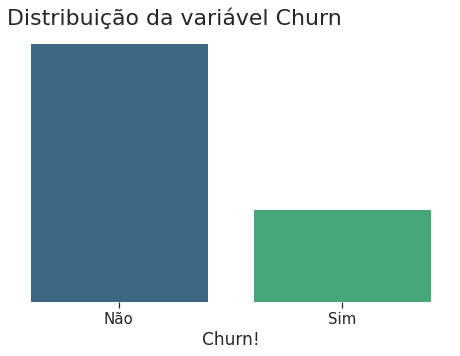

In [7]:
plot_countplot(dados=df, 
               x='Churn', 
               titulo="Distribuição da variável Churn",
               label_x='Churn!', 
    )

Podemos analisar também por variável de gênero para ver se existe algum impacto a pessoa ser, nesse caso, do gênero masculino ou feminino

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


AttributeError: ignored

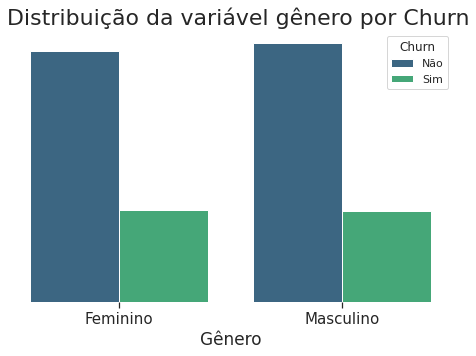

In [10]:
# Plotando o gráfico de Gênero

plot_countplot(dados=df, 
               x='Gênero', 
               titulo="Distribuição da variável gênero por Churn",
               label_x='Gênero', 
               hue='Churn'
    )

Podemos identificar que a variável "gender" **não possui impacto no churn**, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma. 

Vamos plotar os gráficos para os serviços de internet:

AttributeError: ignored

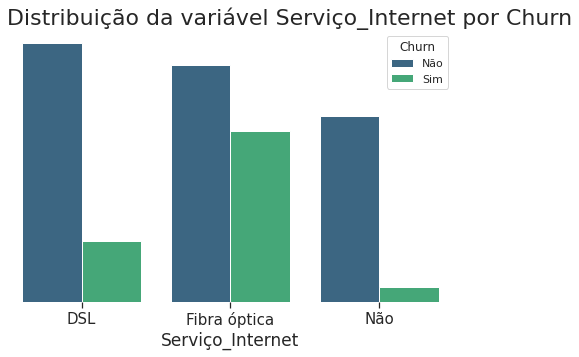

In [11]:
# Plotando o gráfico do serviço de internet

plot_countplot(dados=df, 
               x='Serviço_Internet', 
               titulo="Distribuição da variável Serviço_Internet por Churn",
               label_x='Serviço_Internet', 
               hue='Churn'
    )

Percebe-se analisando o gráfico acima que os clientes que utilizam fibra ótica como serviço de internet possuem uma taxa de churn proporcionalmente maior que os demais. A Alura Voz poderia oferecer mais o tipo de serviço DSL já que possui uma evasão menor, ou identificar quais problemas que está acontecendo com o serviço de fibra ótica e melhorá-lo

AttributeError: ignored

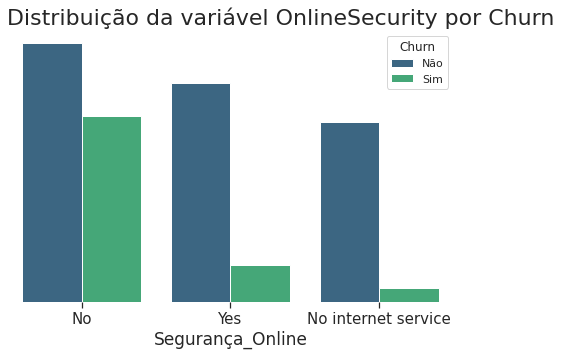

In [18]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não

plot_countplot(dados=df, 
               x='Segurança_Online', 
               titulo="Distribuição da variável OnlineSecurity por Churn",
               label_x='Segurança_Online', 
               hue='Churn'
    )



AttributeError: ignored

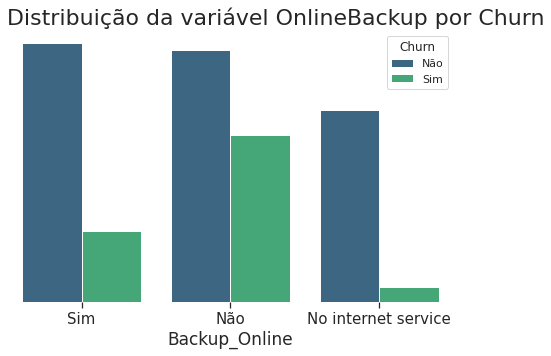

In [19]:
# Plotando o gráfico referente a se o cliente possui ou não um backup online

plot_countplot(dados=df, 
               x='Backup_Online', 
               titulo="Distribuição da variável OnlineBackup por Churn",
               label_x='Backup_Online', 
               hue='Churn'
    )

Do gráfico acima temos que os clientes que não assinam a segurança online e também não possuem backup online tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de segurança online e backup online seria uma uma boa opção para reduzir a taxa de cancelamentos.

AttributeError: ignored

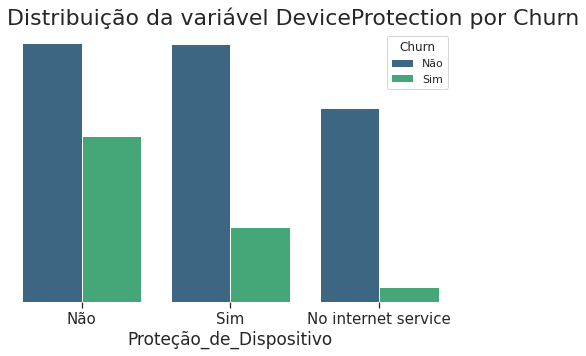

In [21]:
# Plotando o gráfico referente a se o cliente possui proteção do dispositivo ou não

plot_countplot(dados=df, 
               x='Proteção_de_Dispositivo', 
               titulo="Distribuição da variável DeviceProtection por Churn",
               label_x='Proteção_de_Dispositivo', 
               hue='Churn'
    ) 

Do gráfico acima temos que os clientes que não possuem a proteção do dispositivo tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de proteção é uma boa opção para reduzir a taxa de cancelamento.

AttributeError: ignored

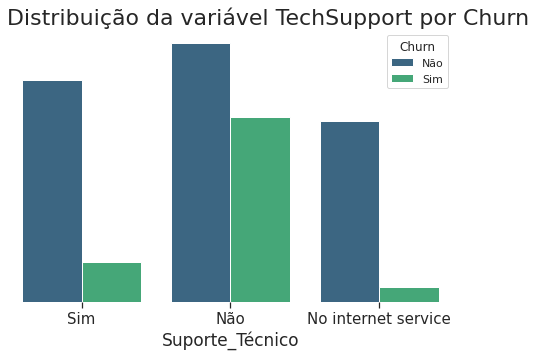

In [23]:
# Plotando o gráfico referente a se o cliente tem suporte técnico ou não.

plot_countplot(dados=df, 
               x='Suporte_Técnico', 
               titulo="Distribuição da variável TechSupport por Churn",
               label_x='Suporte_Técnico', 
               hue='Churn'
    ) 

Clientes que não possuem suporte técnico tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de suporte técnico é uma boa opção para reduzir a taxa de cancelamentos.


AttributeError: ignored

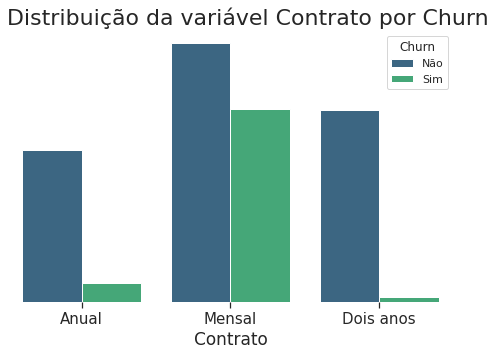

In [24]:
# Plotando o gráfico referente ao prazo do contrato do cliente

plot_countplot(dados=df, 
               x='Contrato', 
               titulo="Distribuição da variável Contrato por Churn",
               label_x='Contrato', 
               hue='Churn',
               small=True
    ) 

Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos. 

AttributeError: ignored

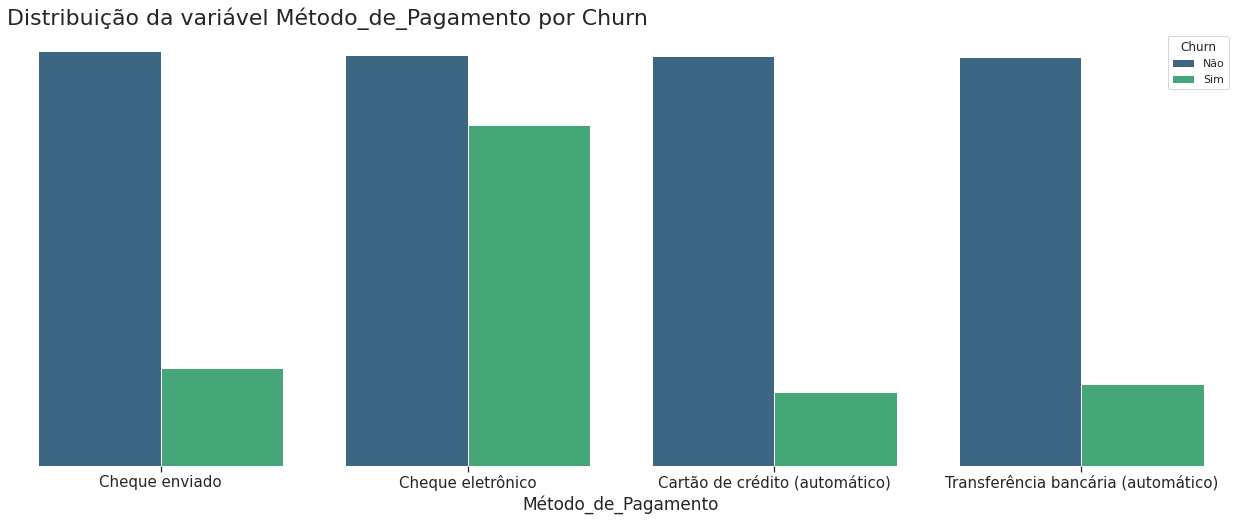

In [29]:
# Plotando o gráfico referente ao método de pagamento do cliente

plot_countplot(dados=df, 
               x='Método_de_Pagamento', 
               titulo="Distribuição da variável Método_de_Pagamento por Churn",
               label_x='Método_de_Pagamento', 
               hue='Churn', 
               figsize=(22, 8)
    ) 

Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da Alura Voz. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos.

AttributeError: ignored

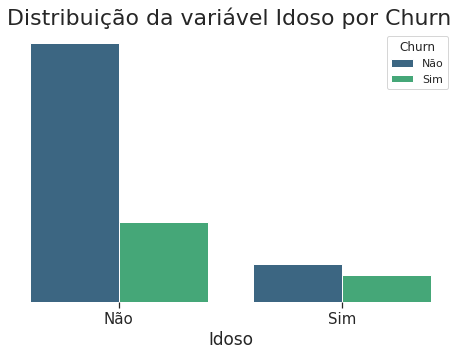

In [31]:
# Plotando o gráfico a se o cliente é idoso ou não por churn.

plot_countplot(dados=df, 
               x='Idoso', 
               titulo="Distribuição da variável Idoso por Churn",
               label_x='Idoso', 
               hue='Churn'
    ) 

Apesar da quantidade de clientes idosos ser menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.

Para fazer uma análise mais aprofundada podemos aplicar o boxplot, e para conhecer melhor pode ler esse artigo: [Melhorando a análise com o Boxplot](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot).

In [33]:
# Imprimindo boxplot com o plotly

for col in ['Tempo_de_Contrato', 'Cobrança_Mensal']:
    fig = box(df, x=col, color='Churn', orientation='h')
    fig.show()

Analisando a feature "tenure", que representa o tempo de contrato do cliente, percebe-se que clientes que estão a mais tempo tendem a continuar a utilizar o serviço.

Para a feature "Charges.Monthly", percebe-se que os clientes que adquirem serviços mais baratos tendem a continuar utilizando o serviço.


In [32]:
df


,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.60,593.30,2.19
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.90,542.40,2.00
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,Não,Cheque enviado,55.15,742.90,1.84
7039,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,85.10,1873.70,2.84
7040,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,50.30,92.75,1.68
7041,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Dois anos,Não,Cheque enviado,67.85,4627.65,2.26


# **Minha** analise

# Analise Churn Sim, ou seja pessoas que sairam da empresa

In [ ]:
churn_sim = df[df.Churn == "Sim"]
churn_sim.shape

(1869, 22)

In [ ]:
churn_nao = df[df.Churn == "Não"]
churn_nao.shape

(5174, 22)

In [ ]:
churn_sim.head(3)

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40,2.80


##Analise tempo de contrato para Churn = sim, ou seja que sairam da empresa.

In [ ]:
churn_sim.Tempo_de_Contrato.describe()



count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tempo_de_Contrato, dtype: float64

###Grafico Tempo de contrato

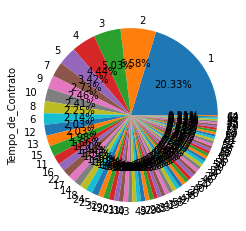

In [ ]:
churn_sim.Tempo_de_Contrato.value_counts().plot(kind = 'pie', autopct='%.2f%%')



> 20 % (maior valor dos qe sairam da empresa, tinham 1 mes de contratos quando resolveram sair).

In [ ]:
cont_tempo_contrato = churn_sim.Tempo_de_Contrato.value_counts()
cont_tempo_contrato


1     380
2     123
3      94
4      83
5      64
     ... 
45      6
44      6
62      5
63      4
64      4
Name: Tempo_de_Contrato, Length: 72, dtype: int64

In [ ]:
analise_contrato = cont_tempo_contrato / len(churn_sim.Tempo_de_Contrato)
analise_contrato

1     0.203317
2     0.065811
3     0.050294
4     0.044409
5     0.034243
        ...   
45    0.003210
44    0.003210
62    0.002675
63    0.002140
64    0.002140
Name: Tempo_de_Contrato, Length: 72, dtype: float64

In [ ]:
analise_contrato = pd.DataFrame(analise_contrato)
analise_contrato

,Tempo_de_Contrato
1,0.203317
2,0.065811
3,0.050294
4,0.044409
5,0.034243
...,...
45,0.003210
44,0.003210
62,0.002675
63,0.002140


In [ ]:
cont_tempo_contrato = pd.DataFrame(cont_tempo_contrato)
cont_tempo_contrato


,Tempo_de_Contrato
1,380
2,123
3,94
4,83
5,64
...,...
45,6
44,6
62,5
63,4


In [ ]:
Contrato_analise = pd.concat([cont_tempo_contrato, analise_contrato],axis=1)
Contrato_analise

,Tempo_de_Contrato,Tempo_de_Contrato
1,380,0.203317
2,123,0.065811
3,94,0.050294
4,83,0.044409
5,64,0.034243
...,...,...
45,6,0.003210
44,6,0.003210
62,5,0.002675
63,4,0.002140


In [ ]:
#Contrato_analise.rename(columns= {'Tempo_de_Contrato':'Tempo_de_Contrato', 'Tempo_de_Contrato':'Porcentagem'}, inplace=True)
Contrato_analise.columns = ['Tempo_de_Contrato','Porcentagem']
Contrato_analise.Porcentagem = Contrato_analise.Porcentagem.round(2)

In [ ]:
Contrato_analise

,Tempo_de_Contrato,Porcentagem
1,380,0.20
2,123,0.07
3,94,0.05
4,83,0.04
5,64,0.03
...,...,...
45,6,0.00
44,6,0.00
62,5,0.00
63,4,0.00


## Analise Genero

In [ ]:
churn_sim

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.80
18,0022-TCJCI,Sim,Masculino,Sim,Não,Não,45,Sim,Não,DSL,...,Sim,Não,Não,Sim,Anual,Não,Cartão de crédito (automático),62.70,2791.50,2.09
19,0023-HGHWL,Sim,Masculino,Sim,Não,Não,1,Não,Sem serviço telefônico,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Sim,Masculino,Sim,Não,Não,21,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Transferência bancária (automático),96.80,2030.30,3.23
7023,9965-YOKZB,Sim,Masculino,Sim,Não,Não,9,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,83.85,790.15,2.80
7036,9985-MWVIX,Sim,Feminino,Não,Não,Não,1,Sim,Não,Fibra óptica,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,70.15,70.15,2.34
7037,9986-BONCE,Sim,Feminino,Não,Não,Não,4,Sim,Não,Não,...,No internet service,No internet service,No internet service,No internet service,Mensal,Não,Transferência bancária (automático),20.95,85.50,0.70


### Grafico Genero dos que sairam

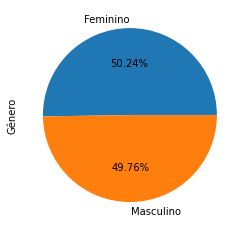

In [ ]:
churn_sim.Gênero.value_counts().plot(kind = 'pie', autopct='%.2f%%')

A porcentagem entre homens e mulheres são praticamente a mesma.

## Analise Dos Idosos que deixaram a empresa

### Grafico dos Idosos (maiores de 65 anos) que sairam da empresa

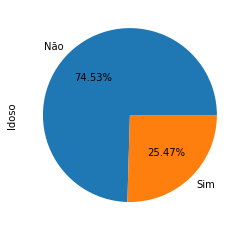

In [ ]:
churn_sim.Idoso.value_counts().plot(kind = 'pie', autopct='%.2f%%')

> Os Idosos sao 75 % dos que sairam da empresa

## Analise dos Clientes com Conjugues que deixaram a empresa

### Grafico dos Clientes com Conjugues ou Parceiros

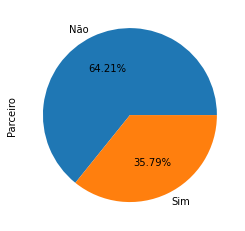

In [ ]:
churn_sim.Parceiro.value_counts().plot(kind = 'pie', autopct='%.2f%%')

> A maioria 64% dos que sairam não possuem conjugues ou parceiro.

## Analise dos que possuem dependentes

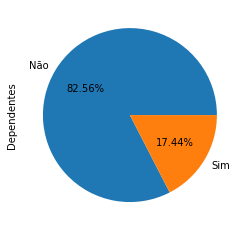

In [ ]:
churn_sim.Dependentes.value_counts().plot(kind = 'pie', autopct='%.2f%%')

> A maioria 83 % não possuem dependentes

## Analise de Serviços que as pessoas possuiam

In [ ]:
churn_sim.columns

Index(['ID_Cliente', 'Churn', 'Gênero', 'Idoso', 'Parceiro', 'Dependentes',
       'Tempo_de_Contrato', 'Serviço_Telefônico', 'Linhas_Múltiplas',
       'Serviço_Internet', 'Segurança_Online', 'Backup_Online',
       'Proteção_de_Dispositivo', 'Suporte_Técnico', 'Streaming_TV',
       'Streaming_de_Filmes', 'Contrato', 'Cobrança_Digital',
       'Método_de_Pagamento', 'Cobrança_Mensal', 'Cobrança_Total',
       'Contas_Diárias'],
      dtype='object')

In [ ]:
analise_servicos = churn_sim.loc[:, ['Serviço_Telefônico','Linhas_Múltiplas','Serviço_Internet','Segurança_Online', 'Backup_Online',
       'Proteção_de_Dispositivo', 'Suporte_Técnico', 'Streaming_TV',
       'Streaming_de_Filmes']]
analise_servicos

,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,Segurança_Online,Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes
2,Sim,Não,Fibra óptica,No,Não,Sim,Não,Não,Não
3,Sim,Não,Fibra óptica,No,Sim,Sim,Não,Sim,Sim
4,Sim,Não,Fibra óptica,No,Não,Não,Sim,Sim,Não
18,Sim,Não,DSL,Yes,Não,Sim,Não,Não,Sim
19,Não,Sem serviço telefônico,DSL,No,Não,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...
7020,Sim,Não,Fibra óptica,No,Não,Sim,Não,Sim,Sim
7023,Sim,Sim,Fibra óptica,No,Não,Não,Não,Não,Sim
7036,Sim,Não,Fibra óptica,No,Não,Não,Não,Não,Não
7037,Sim,Não,Não,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


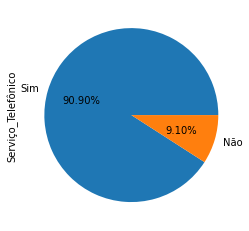

In [ ]:
analise_servicos.Serviço_Telefônico.value_counts().plot(kind = 'pie', autopct='%.2f%%')

A Maioria dos que sairam possuem serviço Telefônico

### Grafico dos clientes que possuiam multiplas linhas telefonicas

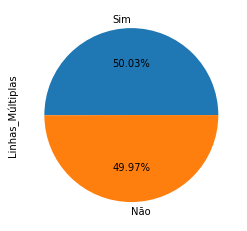

In [ ]:
analise_servicos.query('Serviço_Telefônico == "Sim"').Linhas_Múltiplas.value_counts().plot(kind = 'pie', autopct='%.2f%%')
#analise_servicos.Serviço_Telefônico.value_counts().plot(kind = 'pie', autopct='%.2f%%')


> Metade das pessoas possuiam linhas multiplas 50,03%

## Grafico linha telefonica e serviços de internet

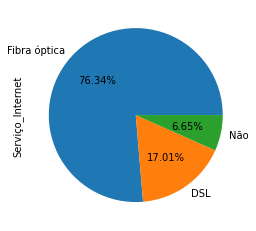

In [ ]:
analise_servicos.query('Serviço_Telefônico == "Sim"').Serviço_Internet.value_counts().plot(kind = 'pie', autopct='%.2f%%')






>76 % dos que possuiam linha telefonica tbm possuiam fibra optica

In [ ]:
!python --version


Python 3.7.13
